In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load dataset
data = pd.read_csv("creditcard.csv")  # Download from Kaggle

# Step 2: Basic exploration
print("Data shape:", data.shape)
print("Missing values:", data.isnull().sum().sum())
print("Class distribution:\n", data['Class'].value_counts())


Data shape: (284807, 31)
Missing values: 0
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [20]:
# Step 3: Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])



In [ ]:
# Step 4: Split data
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [10]:
# Step 5: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [11]:
# Step 6: Evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[85290     5]
 [   35   113]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



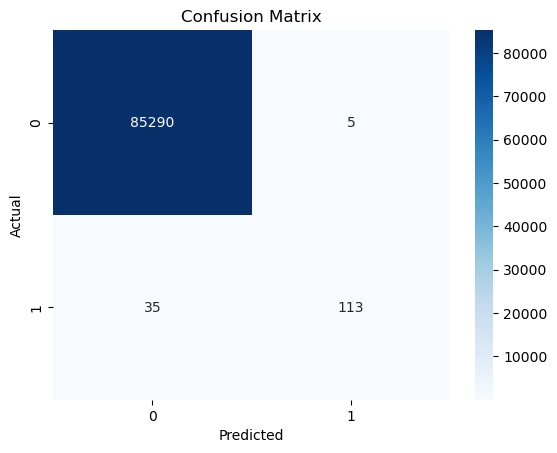

In [12]:
# Step 7: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()